# **`SVM` - Support Vector Machines**
**Main idea** : Tìm mặt phẳng - `hyperplane` **phù hợp nhất**, cụ thể:
- Có thể `tách dữ liệu thành 2 nhóm` và nằm `chính giữa` 2 nhóm dữ liệu đó.
- `Khoảng cách` từ các điểm gần nhất của mỗi nhóm tới mặt phẳng phải là `maximum`

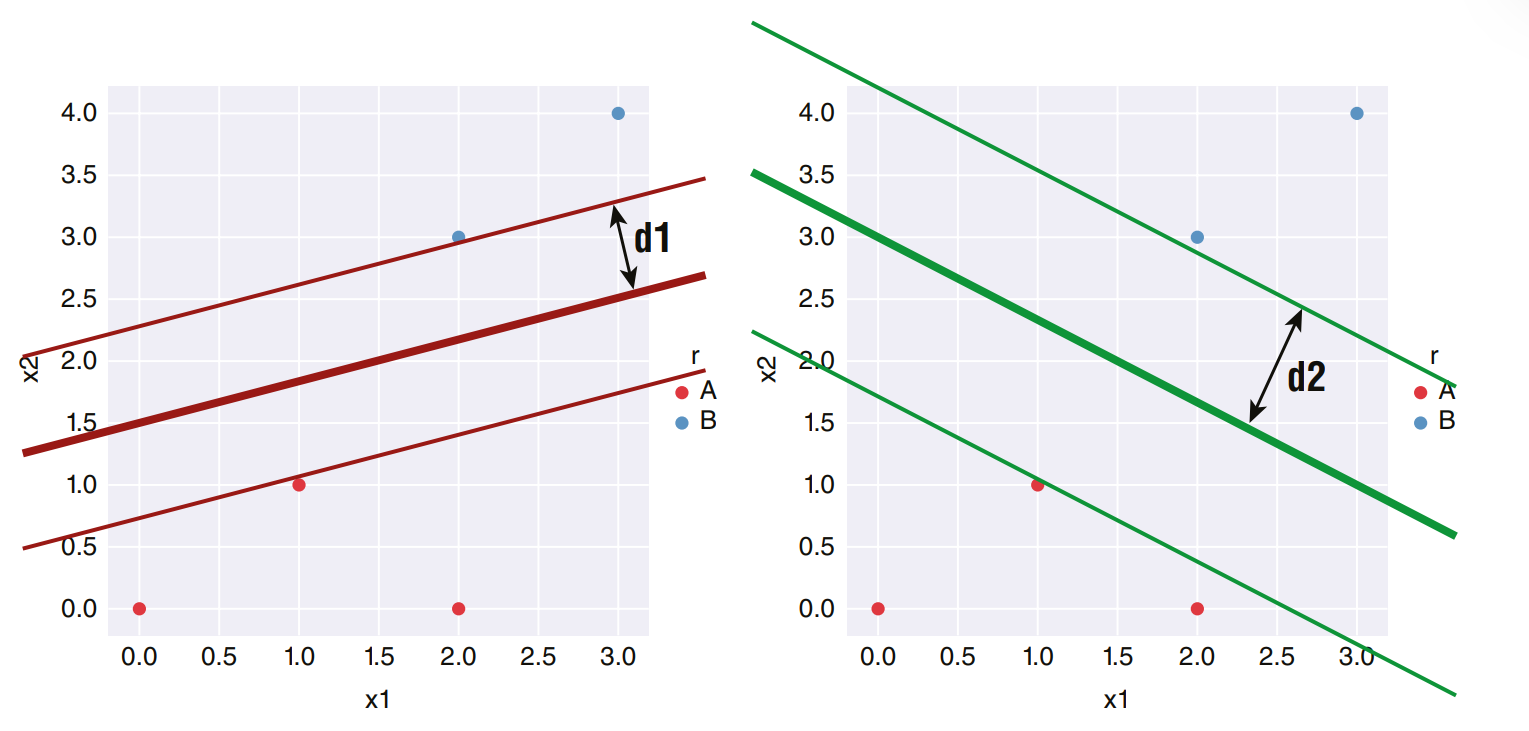  
Ở ví dụ này, rõ ràng `d2>d1` => mặt phẳng ở hình bên phải sẽ được chọn.  
=> dữ liệu được phân loại dữa trên mặt phẳng được chọn.

### **`Support Vector`** 
`Support Vectors` - các điểm nằm trên `margin` (margin đường thẳng đi qua các `điểm gần nhất` ở mỗi nhóm data, mỗi nhóm có 1 đường margin)  
    => `Support Vectors` : Tập các điểm có khoảng cách gần nhất tới `hyperplane`  

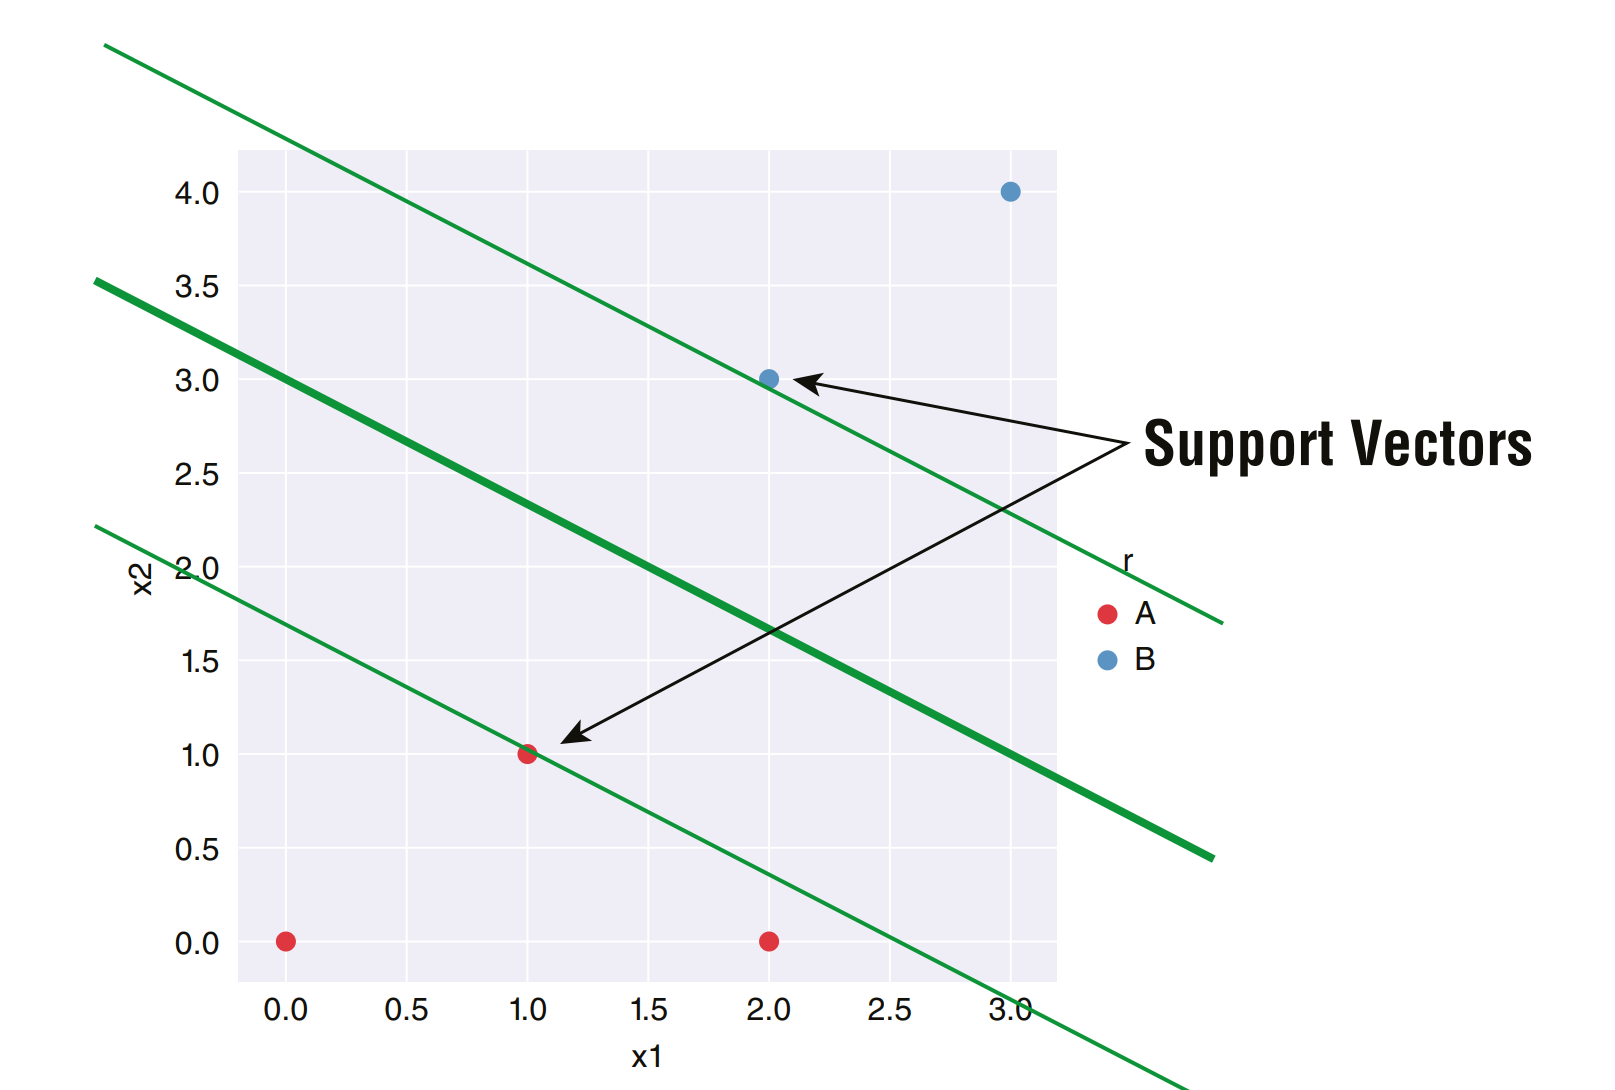

### **Formula for the `Hyperplane`**
```
g(x) = W*X + b = w1*x1 +w2*x2 + ... + wn*xn + b

if:
    - g >= 1 => the point in class 1
    - g <= -1 => the point in class 2
    - g = 0 -> Hyperplane
```
where:
- `W` : are weight vectors.
- `b` : is the bias.
- `x1`,`x2` : is the inputs.

### **`Total Margin`**
`total_margin = 2d = 2/ ||W||`   
where:
    - ||W|| : độ dài - `normalized` vector W -> `||W|| = sqrt(w1**2+w2**2, + ... + wn**2)`

# **Using `sklearn.svm.SVC` for `svm`**

,x1,x2,r
0,2,2,A
1,4,5,B
2,2,4,B
3,0,2,A
4,2,1,A


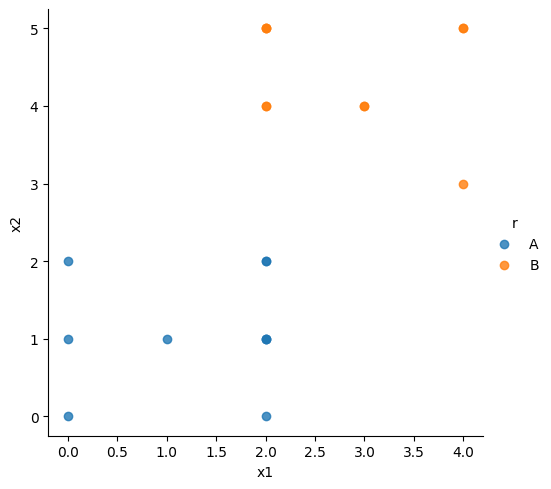

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# using seaborn for hue
import seaborn as sns

np.random.seed(42) 
# Class A
x1_A = np.random.randint(0, 3, 10) 
x2_A = np.random.randint(0, 3, 10)

# Class B
x1_B = np.random.randint(2, 5, 10)  
x2_B = np.random.randint(3, 6, 10) 

x1 = np.concatenate([x1_A, x1_B])
x2 = np.concatenate([x2_A, x2_B])
r = ['A']*10 + ['B']*10

df = pd.DataFrame({'x1': x1, 'x2': x2, 'r': r})

# xáo trộn dữ liệu
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

sns.lmplot(data=df, x='x1', y='x2', hue='r', fit_reg=False)
df.head()

### **Training the model** - using `sklearn.svm.SVC`

In [2]:
from sklearn.svm import SVC

points = df[['x1', 'x2']]
labels = df['r']

# create model
model = SVC(kernel='linear')

# fit model
model.fit(points, labels)

# W-weight vectors -> coef_
W = model.coef_[0]
# -bias -> intercept_
b = model.intercept_[0]
print(f'W: {W}')
print(f'b: {b}')

print(model.support_) # index của mỗi điểm của support vector trong tập X_train
print(model.support_vectors_) # tọa độ các điểm trong support vector
print(model.n_support_) # số điểm support vector trong mỗi lớp
print(np.abs(model.dual_coef_)) # trọng số của từng support vector 
# chỉ cần dual_coef_ và support_vector_ và hệ số b là đủ để tính decision function 

W: [0.5 1. ]
b: -4.0
[ 7  8 17]
[[2. 2.]
 [4. 3.]
 [2. 4.]]
[1 2]
[[0.625 0.25  0.375]]


## **Note**
**`SVC` is Support Vector Classification**. `svm` module contains some more classes that implement SVM for different purpose:
- `LinearSVC` for Linear Support Vector Classification
- `LinearSVR` for Linear Support Vector Regression
- `NuSVC` for Nu-Support Vector Classification
- `NuSVR` for Nu-Support Vector Regression
- `OneClassSVM` for Unsupervised Outlier Detection
- `SVC` for C-Support Vector Classification
- `SVR` for Epsilon-Support Vector Regression

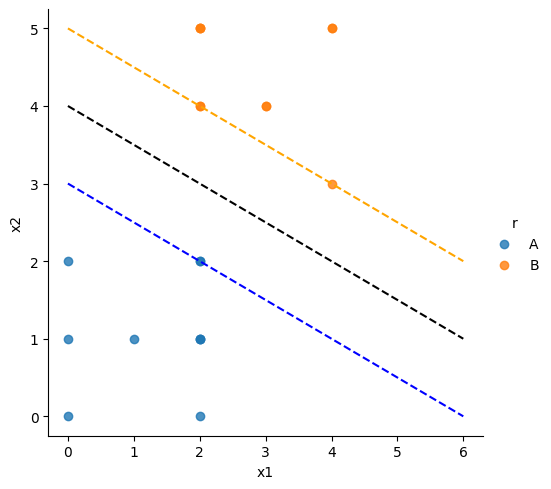

In [3]:
# plotting the Hyperplane and the Margins
w = model.coef_[0]
slope = -w[0]/w[1] # slope of hyperplane
b = model.intercept_[0]

x = np.linspace(0, 6)
# hyperplane : w1x1 + w2x2 + b = 0 -> x2 = (-b-w1x1)/w2 = -b/w2 - slope*x1
y = slope*x - b/w[1]

sns.lmplot(data=df, x='x1', y='x2', hue='r', fit_reg=False)
plt.plot(x, y, 'k--')

# plot the margin
# với margin // với hyperplane và đi qua 1 điểm của SV, ta có
# y=slope*x + c -> c = y - slope*x
# chỉ cần 1 điểm là đủ để tính c
sv_up = model.support_vectors_[-1]
c = sv_up[1] - slope*sv_up[0]
# khi này, đường thẳng có dạng 
# y = slope*x + c
# đi qua toàn bộ tập x -> ta ra được margin
y_up = slope*x + c

sv_down = model.support_vectors_[0]
c = sv_down[1] - slope*sv_down[0]
y_down = slope*x + c

# plot the margin
plt.plot(x, y_up, color='orange', ls='--')
plt.plot(x, y_down, 'b--')


In [4]:
# making prediction
test_points = pd.DataFrame([[3.5, 1], [4,7], [5, 0], [6, 1], [3,6]], columns=['x1', 'x2']) # A, B, A, A, B

print(model.predict(test_points))

['A' 'B' 'A' 'A' 'B']


### **Kernel trick**
Sometime, the points is not `linearly separable`:

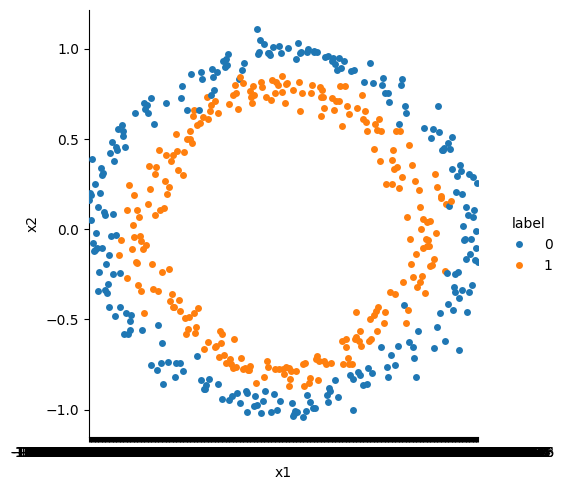

In [5]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, noise=0.05)
# n_features = 2
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = y

sns.catplot(data=df, x='x1', y='x2', hue='label')

-> **`impossible` to draw a `straight line` to separate the 2 set of points.**
Nhưng, dễ thấy:
- `yellow points` nằm bên trong
- `blue points` nằm bên ngoài.

=> **handle:** thêm cột `z = x**2 + y**2`

           x1        x2  label         z
0   -0.830101  0.022421      1  0.689571
1    0.841292  0.172894      1  0.737665
2   -0.682945  0.414469      1  0.638198
3   -0.609058  0.860177      0  1.110856
4   -0.276236 -0.775568      1  0.677813
..        ...       ...    ...       ...
495 -0.533682 -0.834328      0  0.980919
496 -0.325753  0.798377      1  0.743520
497  0.904729  0.511733      0  1.080405
498 -0.999883 -0.236088      0  1.055504
499  0.070714  0.771698      1  0.600518

[500 rows x 4 columns]


Text(0.5, 0, 'z')

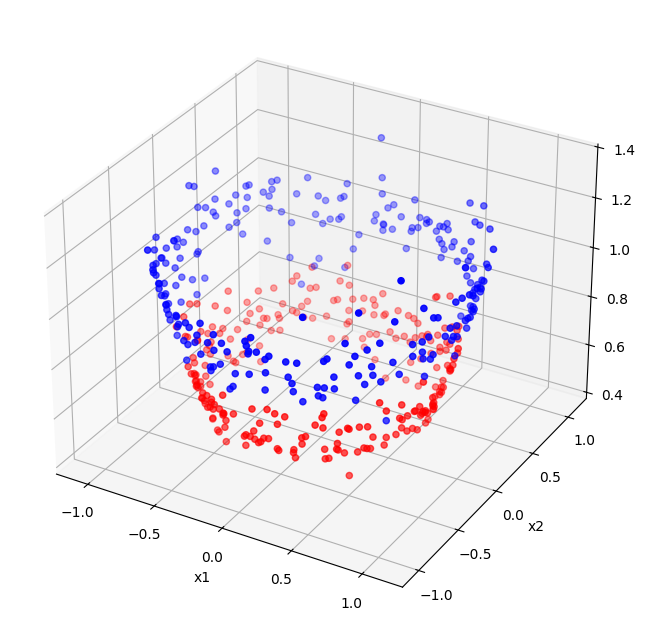

In [6]:
df['z'] = df.x1**2 + df.x2**2
print(df)
# plotting 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors=np.array(['b', 'r'])
ax.scatter(df.x1, df.x2, df.z, color=colors[df.label])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')

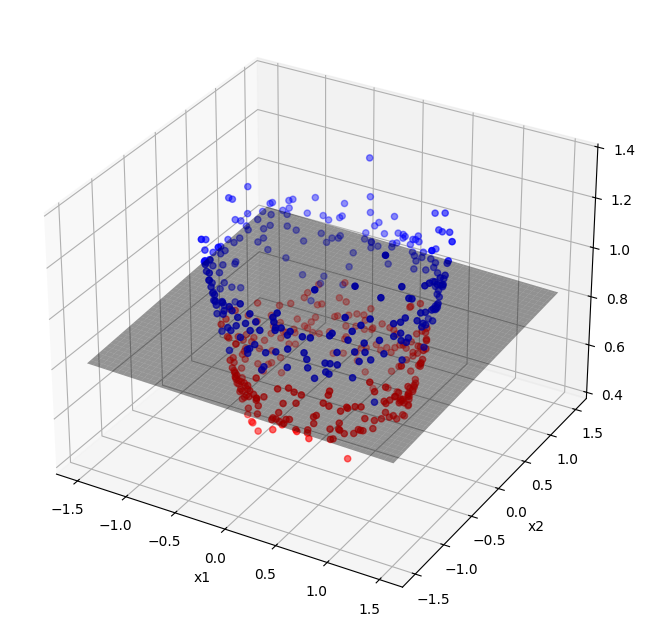

In [7]:
# now, train and plotting Hyperplain
model = SVC(kernel='linear')
model.fit(df[['x1', 'x2', 'z']], df.label)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors=np.array(['b', 'r'])
ax.scatter(df.x1, df.x2, df.z, color=colors[df.label])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')

w = model.coef_[0]
b = model.intercept_[0]

# w1x1 + w2x2 + w3x3 + b = 0
# x3 = (-b-w1x1 - w2x2)/w3
z = lambda x, y: (-b-x*w[0]-y*w[1])/w[2]

tmp = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(tmp, tmp)

ax.plot_surface(x, y, z(x, y), color='None', alpha=0.4)


**Example**

In [8]:
df = pd.DataFrame({
    "size": [550, 1000, 1200, 1500, 3000, 2500, 750, 1500, 780, 1200, 2750],
    "price": [50, 100, 123, 350, 200, 300, 45, 280, 400, 450, 500],
    "sold": ["y", "y", "y", "n", "y", "y", "y", "n", "n", "n", "n"]
})

df['label'] = np.where(df.sold=='y',1, 0)

model = SVC(kernel='linear')
model.fit(df[['size', 'price']], df.label)

def predict(size, price):
    return 'y' if model.predict(pd.DataFrame([[size, price]], columns=['size', 'price']))==1 else 'n'

print(predict(2500, 400))
print(predict(2500, 200))

n
y


In [9]:
w = model.coef_[0]
b = model.intercept_[0]
slope = -w[0]/w[1]

x_min, x_max = df['size'].min()-1, df['size'].max()+1
y_min, y_max = df.price.min()-1, df.price.max()+1

# step 
h = x_max/x_min/20

x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
test_points = pd.DataFrame()
test_points['size'] = x.reshape(-1)
test_points['price'] = y.reshape(-1)

preds = model.predict(test_points)
preds = preds.reshape(x.shape)

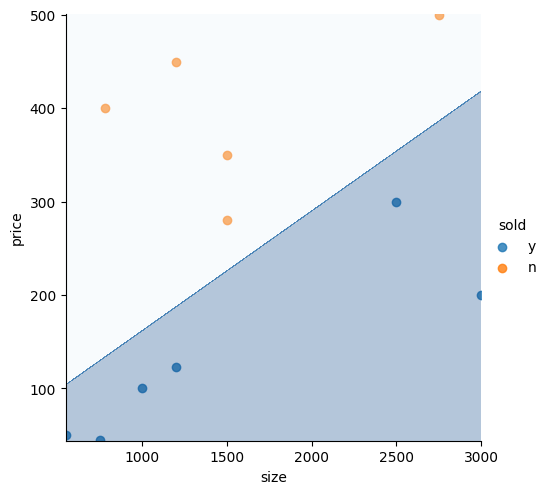

In [10]:
# plotting
sns.lmplot(data=df, x='size', y='price', hue='sold', fit_reg=False)
plt.contourf(x, y, preds, cmap=plt.cm.Blues, alpha=0.3)

## **Readmore about types of kernel** -> `chatGPT`